In [13]:
# libraries
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

#device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#print(device)
device = 'cuda:0'
#Definition of Neural Network Model
class Net(nn.Module):
   def __init__(self):
       super(Net, self).__init__()
       self.layer1 = torch.nn.Linear(1, 10)
       self.layer2 = torch.nn.Linear(10, 1)
   def forward(self, x):
       x = self.layer1(x)
       x = F.relu(x)
       x = self.layer2(x)
       x = F.relu(x)
       return x

net = Net().to(device)
print(net)

Net(
  (layer1): Linear(in_features=1, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=1, bias=True)
)


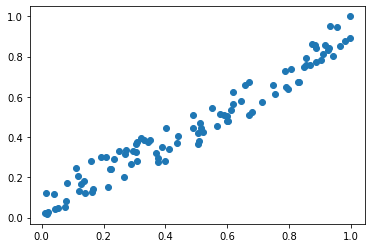

In [14]:
# Visualize our data
import matplotlib.pyplot as plt
import numpy as np

x = np.random.rand(100)
y = np.sin(x) * np.power(x,3) + 3*x + np.random.rand(100)*0.8
y = y/np.max(np.abs(y))
plt.scatter(x, y)
plt.show()

In [15]:
# convert numpy array to tensor in shape of input size
x = torch.from_numpy(x.reshape(-1,1)).float().to(device)
y = torch.from_numpy(y.reshape(-1,1)).float().to(device)
#print(x, y)


In [16]:
# Define Optimizer and Loss Function
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()

In [17]:
from IPython.display import display, clear_output

# Train model on data
inputs = Variable(x)
outputs = Variable(y)


for i in range(250):
   prediction = net(inputs)
   loss = loss_func(prediction, outputs) 
   optimizer.zero_grad()
   loss.backward()        
   optimizer.step()       

   if i % 10 == 0:
       # plot and show learning process
     
       plt.cla() 
       plt.scatter(x.data.cpu().numpy(), y.data.cpu().numpy())
       plt.plot(x.data.cpu().numpy(), prediction.data.cpu().numpy(), 'r.', lw=2)
       plt.text(0.5, 0, 'Loss=%.4f' % loss.data.cpu().numpy(), fontdict={'size': 10, 'color':  'red'})
      
       plt.pause(0.5)
       plt.draw()
       clear_output(wait = True)



<Figure size 432x288 with 0 Axes>